In [1]:
import torch
from torch.autograd import Variable

from torch import nn
import matplotlib.pyplot as plt

In [2]:
torch.manual_seed(3)

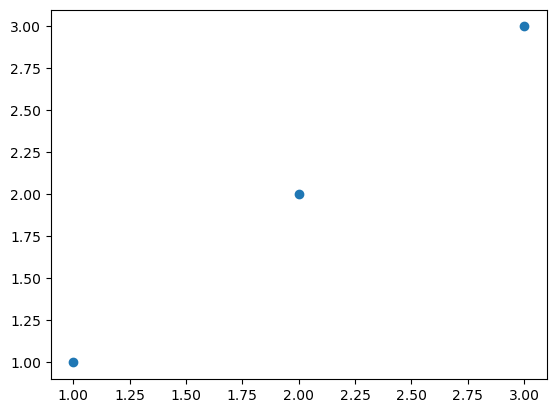

In [3]:
# Make data
x_train = torch.Tensor([[1], [2], [3]])
y_train = torch.Tensor([[1], [2], [3]])

x, y = Variable(x_train), Variable(y_train)

plt.scatter(x.data.numpy(), y.data.numpy())
plt.show()

In [4]:
# Naive Model

W = Variable(torch.rand(1, 1))
x.mm(W)

tensor([[0.0043],
        [0.0085],
        [0.0128]])

In [5]:
# Define cost function
cost_func = nn.MSELoss()

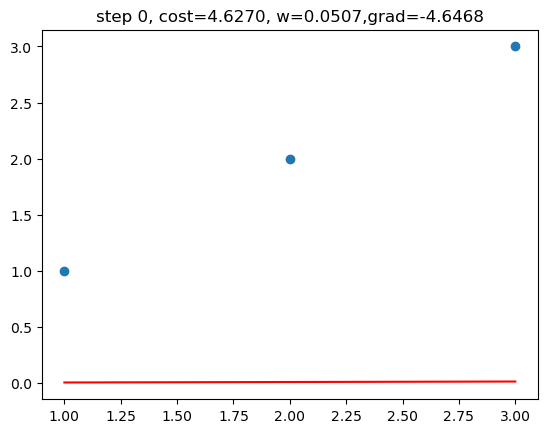

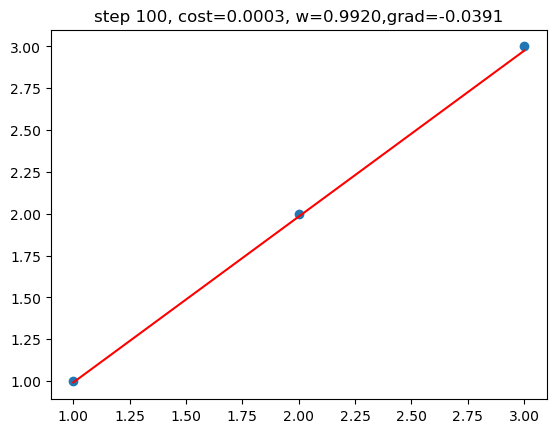

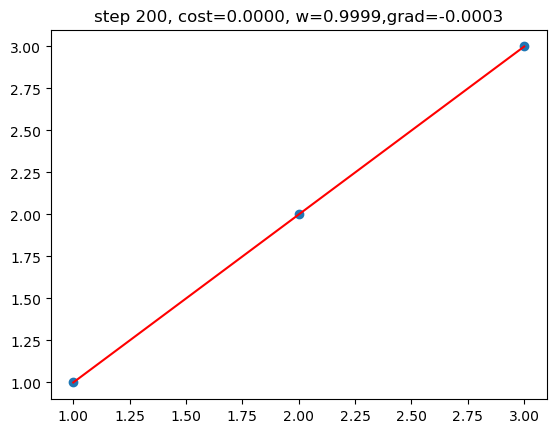

In [6]:
# Training Linear Regression

plt.ion()

lr = 0.01

for step in range(300):
    prediction = x.mm(W)
    cost = cost_func(prediction, y)
    gradient = (prediction - y).view(-1).dot(x.view(-1)) / len(x)
    W -= lr * gradient

    if step % 100 == 0:
        plt.cla()
        plt.scatter(x.data.numpy(), y.data.numpy())
        plt.plot(x.data.numpy(), prediction.data.numpy(), 'r-')
        plt.title('step %d, cost=%.4f, w=%.4f,grad=%.4f' % (step, cost.data, W.data[0], gradient.data))
        plt.show()

#     if step %10 == 0:
#         print(step, "going cost")
#         print(cost)
#         print((prediction-y).view(-1))
#         print((x.view(-1)))
#         print(gradient)
#         print(W)
plt.ioff()

In [7]:
x_test = Variable(torch.Tensor([[5]]))
y_test = x_test.mm(W)
y_test

tensor([[5.0000]])

In [8]:
# w/nn Module
# Define linear Model

model = nn.Linear(1, 1, bias=True)
for i in model.parameters():
    print(i)

Parameter containing:
tensor([[-0.7889]], requires_grad=True)
Parameter containing:
tensor([-0.4283], requires_grad=True)


In [9]:
cost_func = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

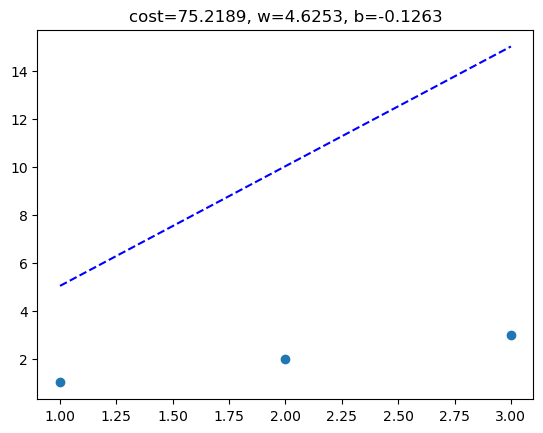

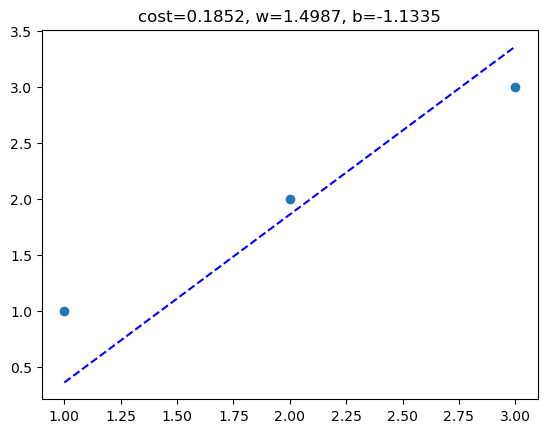

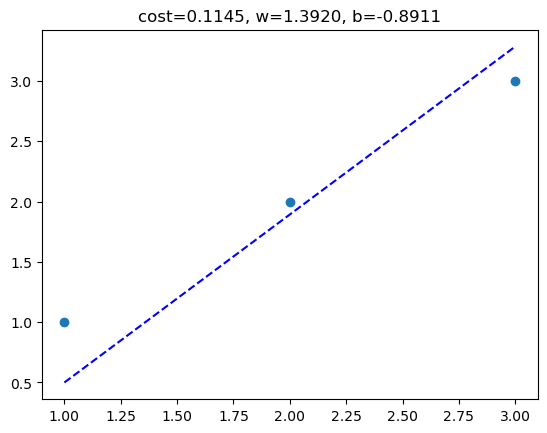

In [16]:
# Training w/nn module
plt.ion()

for step in range(300):
    prediction = model(x)
    cost = cost_func(prediction, y)

    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    if step % 100 == 0:
        plt.cla()
        plt.scatter(x.data.numpy(), y.data.numpy())
        plt.plot(x.data.numpy(), prediction.data.numpy(), 'b--')
        plt.title('cost=%.4f, w=%.4f, b=%.4f' % (cost.data, model.weight.data[0][0], model.bias.data))
        plt.show()

plt.ioff()

In [17]:
x_test = Variable(torch.Tensor([[7]]))
y_test = model(x_test)

print('input : %.4f, output:%.4f' % (x_test.data[0][0], y_test.data[0][0]))

input : 7.0000, output:8.4600


In [18]:
for step in range(300):
    prediction = model(x)
    cost = cost_func(prediction, y)

    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

x_test = Variable(torch.Tensor([[7]]))
y_test = model(x_test)

print('input : %.4f, output:%.4f' % (x_test.data[0][0], y_test.data[0][0]))

input : 7.0000, output:7.7092


In [19]:
for step in range(300):
    prediction = model(x)
    cost = cost_func(prediction, y)

    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

x_test = Variable(torch.Tensor([[7]]))
y_test = model(x_test)

print('input : %.4f, output:%.4f' % (x_test.data[0][0], y_test.data[0][0]))

input : 7.0000, output:7.3445


In [14]:
model.weight, model.bias

(Parameter containing:
 tensor([[0.9849]], requires_grad=True),
 Parameter containing:
 tensor([0.0344], requires_grad=True))

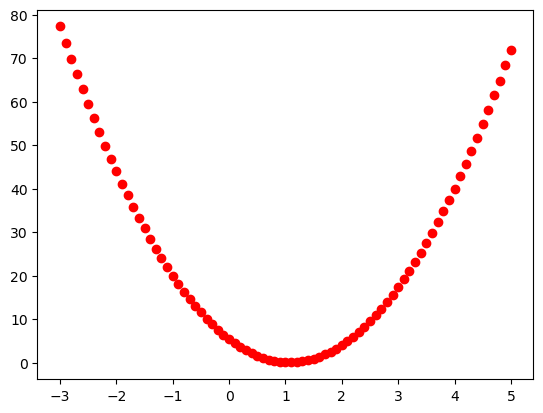

In [20]:
# Convex Cost
W_val, cost_val = [], []

for i in range(-30, 51):
    W = i * 0.1
    model.weight.data.fill_(W)
    cost = cost_func(model(x), y)

    W_val.append(W)
    cost_val.append(cost.data)

plt.plot(W_val, cost_val, 'ro')
plt.show()